# FCBF : Fast Correlation Based Filter for Feature Selection

In [1]:
library("FCBF")
library('mlbench')
library('caret')
set.seed(64)

Loading required package: lattice

Loading required package: ggplot2



In [2]:
sessionInfo()$ R.version$version.string


[1] "R version 4.1.0 (2021-05-18)"

## Read pre-processed input data

In [3]:
# GideHugoRiaz_AntiPD1_rmcorr <- readRDS("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/train_AntiPD1_rmcorr.rds")
mod_inp_mat <- readRDS("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/mod_inp_mat_AntiPD1.rds")

In [4]:
# dividing data into discrete expression and response
expr <- mod_inp_mat[,-which(colnames(mod_inp_mat) %in%
                                        c("Patient", "OS", "OS.Event", "RECIST", "Age", "Gender", "Response","Source"))]
expr <- t(expr)
discrete_expression <- as.data.frame(discretize_exprs(expr))
res <- as.factor(mod_inp_mat$Response)

## SU Plot

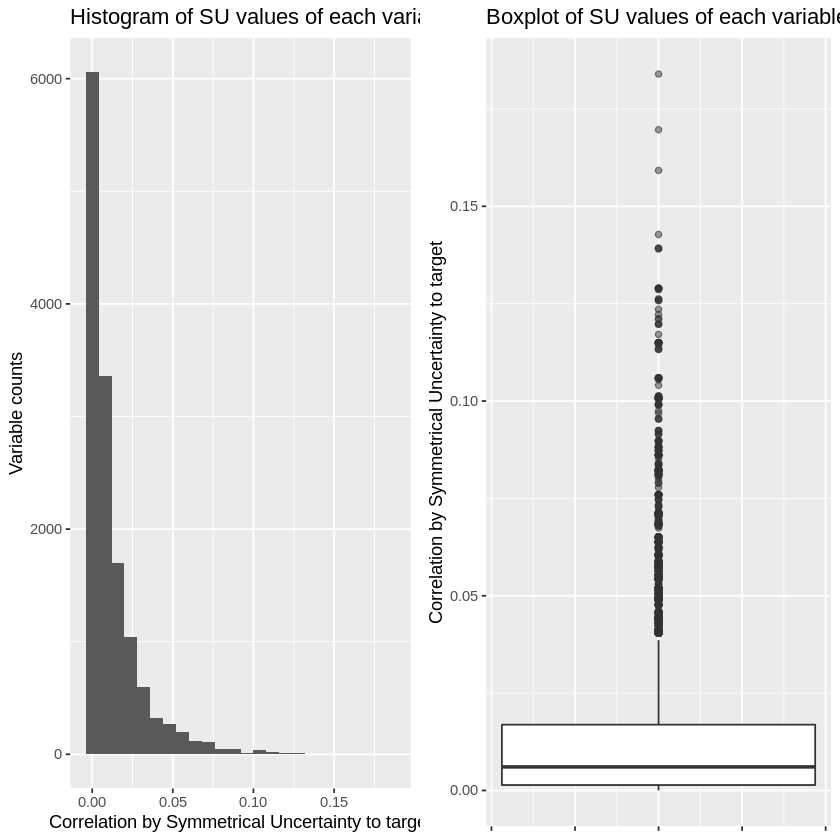

In [5]:
su_plot(discrete_expression,res)

## FCBF Analysis

Change cutoff???

In [6]:
fcbf_features <- fcbf(
                      discrete_expression,
                      res,
                      n_genes_selected_in_first_step = 6541,
                      minimum_su = 0.05,
                      verbose = FALSE,
                      samples_in_rows = FALSE,
                      balance_classes = FALSE
                     )


[1] "Number of features features =  13960"
[1] "Number of prospective features =  6589"
[1] "Number of final features =  43"


In [7]:
fcbf_table <- expr[fcbf_features$index,]

high_variance_genes <- sort(apply(expr, 1, var, na.rm = TRUE), decreasing = TRUE)
variance_table <- expr[names(high_variance_genes)[1:100], ]

In [8]:
length(rownames(variance_table))
head(rownames(variance_table))  

[1] 100

[1] "6192" "6490" "3852" "3861" "3853" "3848"

In [9]:
dataset_fcbf <- cbind(as.data.frame(t(fcbf_table)),Response = res)
dataset_100_var <- cbind(as.data.frame(t(variance_table)),Response = res)

In [10]:
# dataset_fcbf$Response <- as.character(dataset_fcbf$Response)
# dataset_fcbf$Response



# dataset_fcbf[dataset_fcbf$Response == '1',"Response"] <- 'Y' 
# dataset_fcbf[dataset_fcbf$Response == '0', "Response"] <- 'N' 
# dataset_fcbf$Response <- as.factor(dataset_fcbf$Response)
dim(dataset_fcbf)
head(dataset_fcbf)

[1] 74 44

,8325,4958,2218,408050,6891,146,441263,2259,554279,221656,⋯,85449,1152,348995,57700,79722,6094,5018,4325,2908,Response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,-0.2270632,0.48450224,0.36688764,-1.5161359,-0.9072911,-0.025742090,0.60301837,-0.38976236,-0.08834383,0.42037408,⋯,0.3311769,1.0075390,0.3949756,0.27332112,-0.13006631,-0.006034868,-0.09064108,-1.1941896,-0.26229064,N
5,-0.2633813,0.56665809,0.95794550,-0.2349990,-0.9926262,-0.005642442,0.05591390,-0.26230614,-0.11466172,-0.50041499,⋯,-2.0757866,-0.7726069,-0.6712026,0.12739647,-0.19295919,0.066486884,0.84559918,0.4998832,-0.46843489,N
6,-0.2545976,-0.98655332,0.44380029,0.1832004,-0.7013476,-0.030263057,0.09014593,0.18714923,-0.11466172,-0.38191768,⋯,-2.0694569,-1.1504375,-0.5420843,-0.02331193,-0.09393971,-0.494409585,0.63911734,2.6353718,-0.21054669,N
7,-0.1389665,-0.97324062,-0.06217297,-0.5044181,-0.4612209,-0.030263057,1.62351592,-0.04892283,0.15122026,-0.33103494,⋯,1.8672469,1.1037576,-0.2537941,-0.54030865,-0.24247473,-0.238561443,0.22792672,1.1160561,0.51357496,N
8,0.3670001,0.99923576,0.71220351,0.3535976,-1.1767555,0.231846708,0.13861574,1.61150477,-0.11466172,-0.07873951,⋯,-0.0873277,-0.1138601,-0.4991903,-0.42937926,-0.24247473,-0.279150599,-0.16317273,3.8598474,-0.13117695,N
9,0.1371487,0.04363911,0.22107234,-0.1028736,0.6538728,-0.028176013,-0.34377838,0.96765944,-0.04631717,0.31680523,⋯,-0.8537098,-1.0699562,-0.0474628,-0.31391990,0.03816384,0.270347614,-0.41442483,2.6394900,0.07843142,N


In [11]:
dim(dataset_100_var)
head(dataset_100_var)

[1]  74 101

,6192,6490,3852,3861,3853,3848,2315,3854,1638,3868,⋯,4359,4948,2138,1001,9547,10563,1158,5349,11005,Response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,1.0452034,4.6718764,4.785095,4.127868,4.0697628,4.88217256,3.126569,4.1199842,-2.5131510,2.2225903,⋯,-1.6569232,4.5384771,-1.919805,0.9480064,0.3404526,-2.3200023,-1.1018608,-1.3944122,2.8875896,N
5,0.7600579,2.9382022,5.983114,5.497678,6.3933121,6.34335655,3.182154,6.3843850,0.8688709,6.3989079,⋯,-1.9465981,0.2150813,1.219030,2.7280569,1.3995345,-2.3406111,-1.1018608,-0.4341261,3.2718157,N
6,0.8019501,-0.1612151,5.362423,4.865291,8.1196331,0.05878454,1.298456,6.5464218,1.0447218,6.0050718,⋯,-1.6421295,-1.6695105,4.606796,1.4335151,-1.1523720,-2.4209234,0.7394931,3.0133222,4.8160502,N
7,-3.9793121,-0.3305673,6.288957,6.080105,2.0706293,6.88289381,-0.353756,2.0147849,5.2334936,0.2219271,⋯,-0.6674875,3.9168087,-1.086768,1.9109807,1.3283788,-1.8508373,-1.0245790,0.8296600,3.9627116,N
8,3.9610464,-4.1664183,-1.163962,-1.136726,-0.1453651,0.13311558,-4.218951,-0.5320417,-3.1268999,-0.9913737,⋯,1.0957233,-1.3354917,2.433315,-2.9580068,-0.5043511,-0.4210969,-1.1018608,-0.5436343,-0.3038497,N
9,2.5153674,-5.5954656,2.538267,2.517984,1.7121346,2.72002956,-1.624688,0.4231666,-1.0019228,0.3666814,⋯,4.2568351,-1.6340046,3.876589,-2.4236581,1.0360513,0.3772110,-0.9698497,-1.0099177,0.8407393,N


## Output Gene Lists

In [12]:
fcbf.list <- colnames(dataset_fcbf)[-which(colnames(dataset_fcbf) %in% c("Response"))]
top100var.list <- colnames(dataset_100_var)[-which(colnames(dataset_100_var) %in% c("Response"))]
saveRDS(fcbf.list, "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/fcbf44.list.rds")
saveRDS(top100var.list, "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/top100var.list.rds")

# ROC Analysis

In [13]:
control <- trainControl(method="repeatedcv", number=10, repeats=3, 
                     summaryFunction=twoClassSummary, classProbs=T,savePredictions = T)


## glmNet

In [14]:
glm_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "glmnet",
        trControl = control)

glm_top_100_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_100_var,
        method = "glmnet",
        trControl = control)

glm_fcbf_results <- glm_fcbf$results[glm_fcbf$results$ROC == max(glm_fcbf$results$ROC),]
glm_top_100_var_results <- glm_top_100_var$results[glm_top_100_var$results$ROC == max(glm_top_100_var$results$ROC),]

cat(paste0("For top 100 var: \n",
  "ROC = ",  glm_top_100_var_results$ROC, "\n",
             "Sensitivity  = ", glm_top_100_var_results$Sens, "\n",
             "Specificity  = ", glm_top_100_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  glm_fcbf_results$ROC, "\n",
             "Sensitivity  = ", glm_fcbf_results$Sens, "\n",
             "Specificity  = ", glm_fcbf_results$Spec))

For top 100 var: 
ROC = 0.597222222222222
Sensitivity  = 0.638333333333333
Specificity  = 0.502777777777778

For FCBF: 
ROC = 0.880555555555556
Sensitivity  = 0.816666666666667
Specificity  = 0.802777777777778

## SVM

In [15]:
svm_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "svmRadial",
        trControl = control)

svm_top_100_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_100_var,
        method = "svmRadial",
        trControl = control)

svm_fcbf_results <- svm_fcbf$results[svm_fcbf$results$ROC == max(svm_fcbf$results$ROC),]
svm_top_100_var_results <- svm_top_100_var$results[svm_top_100_var$results$ROC == max(svm_top_100_var$results$ROC),]

cat(paste0("For top 100 var: \n",
  "ROC = ",  svm_top_100_var_results$ROC, "\n",
             "Sensitivity  = ", svm_top_100_var_results$Sens, "\n",
             "Specificity  = ", svm_top_100_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  svm_fcbf_results$ROC, "\n",
             "Sensitivity  = ", svm_fcbf_results$Sens, "\n",
             "Specificity  = ", svm_fcbf_results$Spec))

For top 100 var: 
ROC = 0.524861111111111
Sensitivity  = 0.858333333333333
Specificity  = 0.15

For FCBF: 
ROC = 0.900555555555556
Sensitivity  = 0.793333333333333
Specificity  = 0.811111111111111

## PCA Neural Network

In [16]:
nnet_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "pcaNNet",
        trControl = control)

nnet_top_100_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_100_var,
        method = "pcaNNet",
        trControl = control)

nnet_fcbf_results <- nnet_fcbf$results[nnet_fcbf$results$ROC == max(nnet_fcbf$results$ROC),]
nnet_top_100_var_results <- nnet_top_100_var$results[nnet_top_100_var$results$ROC == max(nnet_top_100_var$results$ROC),]

cat(paste0("For top 100 var: \n",
  "ROC = ",  nnet_top_100_var_results$ROC, "\n",
             "Sensitivity  = ", nnet_top_100_var_results$Sens, "\n",
             "Specificity  = ", nnet_top_100_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  nnet_fcbf_results$ROC, "\n",
             "Sensitivity  = ", nnet_fcbf_results$Sens, "\n",
             "Specificity  = ", nnet_fcbf_results$Spec))

# weights:  43
initial  value 36.005765 
iter  10 value 11.247744
iter  20 value 5.761444
iter  30 value 3.925740
iter  40 value 3.914908
iter  50 value 3.902541
iter  60 value 3.890620
iter  70 value 3.878892
iter  80 value 3.878758
iter  90 value 3.878730
iter 100 value 3.878502
final  value 3.878502 
stopped after 100 iterations
# weights:  125
initial  value 34.047827 
iter  10 value 4.652491
iter  20 value 3.809472
iter  30 value 3.722710
iter  40 value 3.608108
iter  50 value 3.521662
iter  60 value 3.011181
iter  70 value 3.007647
iter  80 value 2.993658
iter  90 value 2.016714
iter 100 value 2.004554
final  value 2.004554 
stopped after 100 iterations
# weights:  207
initial  value 30.559486 
iter  10 value 6.003851
iter  20 value 4.001846
iter  30 value 3.999935
iter  40 value 3.246489
iter  50 value 2.000697
iter  60 value 2.000424
iter  70 value 2.000253
iter  80 value 2.000071
iter  90 value 2.000022
iter 100 value 2.000013
final  value 2.000013 
stopped after 100 iteration

initial  value 35.340044 
iter  10 value 12.437195
iter  20 value 10.250914
iter  30 value 10.043698
iter  40 value 10.020692
iter  50 value 9.946046
iter  60 value 9.601398
iter  70 value 9.516615
iter  80 value 9.069785
iter  90 value 9.024095
iter 100 value 7.399764
final  value 7.399764 
stopped after 100 iterations
# weights:  122
initial  value 37.791785 
iter  10 value 14.095678
iter  20 value 11.995182
iter  30 value 10.044269
iter  40 value 9.747919
iter  50 value 9.692985
iter  60 value 7.582355
iter  70 value 5.677857
iter  80 value 5.629662
iter  90 value 5.423351
iter 100 value 2.113431
final  value 2.113431 
stopped after 100 iterations
# weights:  202
initial  value 33.075659 
iter  10 value 2.093452
iter  20 value 2.057517
iter  30 value 2.038642
iter  40 value 2.001558
iter  50 value 1.635389
iter  60 value 0.127837
iter  70 value 0.079257
iter  80 value 0.056605
iter  90 value 0.047102
iter 100 value 0.041511
final  value 0.041511 
stopped after 100 iterations
# weigh

initial  value 38.855304 
iter  10 value 5.551255
iter  20 value 3.714224
iter  30 value 2.988207
iter  40 value 1.957953
iter  50 value 0.823571
iter  60 value 0.027324
iter  70 value 0.003092
iter  80 value 0.001299
iter  90 value 0.000808
iter 100 value 0.000229
final  value 0.000229 
stopped after 100 iterations
# weights:  43
initial  value 34.838563 
iter  10 value 13.695369
iter  20 value 10.642230
iter  30 value 9.551132
iter  40 value 9.503357
final  value 9.503307 
converged
# weights:  125
initial  value 41.182479 
iter  10 value 9.275226
iter  20 value 6.801621
iter  30 value 6.494085
iter  40 value 6.435174
iter  50 value 6.434195
iter  60 value 6.371345
iter  70 value 6.365863
final  value 6.365832 
converged
# weights:  207
initial  value 38.489875 
iter  10 value 10.175095
iter  20 value 7.745417
iter  30 value 7.631285
iter  40 value 7.605980
iter  50 value 7.600256
iter  60 value 7.600106
final  value 7.600103 
converged
# weights:  43
initial  value 33.956065 
iter  

initial  value 38.454327 
iter  10 value 18.961636
iter  20 value 11.088255
iter  30 value 9.002572
iter  40 value 8.137731
iter  50 value 7.542759
iter  60 value 7.176252
iter  70 value 7.043205
iter  80 value 6.981343
final  value 6.981221 
converged
# weights:  202
initial  value 38.908219 
iter  10 value 9.052729
iter  20 value 7.218351
iter  30 value 7.099960
iter  40 value 6.879418
iter  50 value 6.747909
iter  60 value 6.736278
iter  70 value 6.736257
iter  70 value 6.736257
iter  70 value 6.736257
final  value 6.736257 
converged
# weights:  42
initial  value 36.467788 
iter  10 value 5.720646
iter  20 value 3.942994
iter  30 value 3.912231
iter  40 value 3.909588
iter  50 value 3.907399
iter  60 value 3.905706
iter  70 value 3.903757
iter  80 value 3.902412
iter  90 value 3.901538
iter 100 value 3.901271
final  value 3.901271 
stopped after 100 iterations
# weights:  122
initial  value 33.645510 
iter  10 value 2.930558
iter  20 value 0.086650
iter  30 value 0.072451
iter  40 

initial  value 33.269497 
iter  10 value 11.471687
iter  20 value 5.741551
iter  30 value 2.516495
iter  40 value 0.006862
iter  50 value 0.001964
final  value 0.000096 
converged
# weights:  125
initial  value 38.611186 
iter  10 value 2.699318
iter  20 value 0.015990
iter  30 value 0.002605
iter  40 value 0.001088
iter  50 value 0.000546
iter  60 value 0.000200
iter  70 value 0.000101
iter  70 value 0.000062
iter  70 value 0.000062
final  value 0.000062 
converged
# weights:  207
initial  value 34.485144 
iter  10 value 6.590951
iter  20 value 4.004650
iter  30 value 3.999874
iter  40 value 3.999871
iter  50 value 3.999869
iter  60 value 3.999867
iter  70 value 3.999864
iter  80 value 3.999862
iter  90 value 3.999859
iter 100 value 3.999857
final  value 3.999857 
stopped after 100 iterations
# weights:  43
initial  value 41.421452 
iter  10 value 14.757105
iter  20 value 8.031050
iter  30 value 7.942121
final  value 7.942094 
converged
# weights:  125
initial  value 37.118721 
iter  

initial  value 32.910477 
iter  10 value 9.799599
iter  20 value 5.754792
iter  30 value 5.738412
iter  40 value 5.692288
iter  50 value 3.446979
iter  60 value 1.992254
iter  70 value 1.988749
iter  80 value 1.984920
iter  90 value 1.981210
iter 100 value 1.979650
final  value 1.979650 
stopped after 100 iterations
# weights:  122
initial  value 33.434220 
iter  10 value 9.000721
iter  20 value 6.316318
iter  30 value 6.272763
iter  40 value 6.230729
iter  50 value 6.172423
iter  60 value 4.894766
iter  70 value 4.111224
iter  80 value 4.106561
iter  90 value 3.974746
iter 100 value 2.159037
final  value 2.159037 
stopped after 100 iterations
# weights:  202
initial  value 39.009992 
iter  10 value 2.905440
iter  20 value 2.068498
iter  30 value 2.060911
iter  40 value 2.053937
iter  50 value 2.045682
iter  60 value 2.040452
iter  70 value 2.036279
iter  80 value 2.032270
iter  90 value 2.027141
iter 100 value 2.024744
final  value 2.024744 
stopped after 100 iterations
# weights:  42

initial  value 33.252886 
iter  10 value 5.844597
iter  20 value 3.952538
iter  30 value 3.889434
iter  40 value 1.986444
iter  50 value 1.943194
iter  60 value 1.919001
iter  70 value 1.918060
iter  80 value 1.913039
iter  90 value 1.906301
iter 100 value 1.886160
final  value 1.886160 
stopped after 100 iterations
# weights:  202
initial  value 37.404224 
iter  10 value 6.213379
iter  20 value 3.998996
iter  30 value 2.017717
iter  40 value 2.003816
iter  50 value 2.000238
iter  60 value 2.000137
iter  70 value 2.000078
iter  80 value 2.000033
final  value 2.000021 
converged
# weights:  42
initial  value 35.595037 
iter  10 value 17.599828
iter  20 value 10.950271
iter  30 value 9.596928
iter  40 value 9.564337
final  value 9.564268 
converged
# weights:  122
initial  value 36.178014 
iter  10 value 11.807593
iter  20 value 7.578375
iter  30 value 7.340803
iter  40 value 6.938239
iter  50 value 6.880794
iter  60 value 6.879271
final  value 6.879270 
converged
# weights:  202
initial

initial  value 42.027980 
iter  10 value 8.794870
iter  20 value 5.975958
iter  30 value 5.655874
iter  40 value 5.608401
iter  50 value 5.606822
final  value 5.606781 
converged
# weights:  42
initial  value 38.312020 
iter  10 value 11.880895
iter  20 value 11.291224
iter  30 value 10.573219
iter  40 value 10.538870
iter  50 value 10.515674
iter  60 value 10.468051
iter  70 value 10.460594
iter  80 value 10.456901
iter  90 value 8.631963
iter 100 value 7.075568
final  value 7.075568 
stopped after 100 iterations
# weights:  122
initial  value 33.863684 
iter  10 value 4.744422
iter  20 value 2.106071
iter  30 value 2.086833
iter  40 value 2.083203
iter  50 value 2.059941
iter  60 value 2.039700
iter  70 value 2.037610
iter  80 value 2.035218
iter  90 value 2.034314
iter 100 value 2.033524
final  value 2.033524 
stopped after 100 iterations
# weights:  202
initial  value 32.980842 
iter  10 value 4.353348
iter  20 value 4.062821
iter  30 value 4.052258
iter  40 value 4.036854
iter  50

initial  value 35.362586 
iter  10 value 13.192976
iter  20 value 13.137269
iter  30 value 12.959939
iter  40 value 11.822319
iter  50 value 11.821961
iter  60 value 11.821871
iter  70 value 10.421537
iter  80 value 8.943593
iter  90 value 8.941808
iter 100 value 7.382203
final  value 7.382203 
stopped after 100 iterations
# weights:  122
initial  value 35.638531 
iter  10 value 7.994238
iter  20 value 5.993427
iter  30 value 5.992778
iter  40 value 5.991985
iter  50 value 5.990994
iter  60 value 5.989729
iter  70 value 5.988077
iter  80 value 5.985862
iter  90 value 5.982839
iter 100 value 5.978732
final  value 5.978732 
stopped after 100 iterations
# weights:  202
initial  value 37.588453 
iter  10 value 6.156194
iter  20 value 5.008055
iter  30 value 4.999977
iter  40 value 4.999875
iter  50 value 4.999757
iter  60 value 4.998476
iter  70 value 4.993032
iter  80 value 4.989173
iter  90 value 4.977154
iter 100 value 4.694226
final  value 4.694226 
stopped after 100 iterations
# weigh

initial  value 35.647947 
iter  10 value 23.625925
iter  20 value 20.797094
iter  30 value 19.631098
iter  40 value 19.623495
iter  50 value 19.622657
iter  60 value 19.622547
final  value 19.622543 
converged
# weights:  158
initial  value 39.808166 
iter  10 value 10.498079
iter  20 value 3.806088
iter  30 value 1.707710
iter  40 value 1.670462
iter  50 value 1.525774
iter  60 value 1.499056
iter  70 value 1.011848
iter  80 value 1.001594
iter  90 value 1.000743
iter 100 value 1.000247
final  value 1.000247 
stopped after 100 iterations
# weights:  262
initial  value 36.338820 
iter  10 value 10.065138
iter  20 value 7.049457
iter  30 value 6.606901
iter  40 value 6.519331
iter  50 value 5.827281
iter  60 value 5.077156
iter  70 value 4.829115
iter  80 value 4.793710
iter  90 value 4.786561
iter 100 value 4.785403
final  value 4.785403 
stopped after 100 iterations
# weights:  54
initial  value 35.860887 
iter  10 value 22.073250
iter  20 value 16.454278
iter  30 value 14.257098
iter

initial  value 32.904467 
iter  10 value 24.745940
iter  20 value 21.583839
iter  30 value 15.096771
iter  40 value 12.446013
iter  50 value 12.436193
iter  60 value 12.433886
iter  70 value 12.433656
iter  80 value 12.433479
iter  90 value 12.433436
iter 100 value 12.433362
final  value 12.433362 
stopped after 100 iterations
# weights:  158
initial  value 35.792812 
iter  10 value 19.540164
iter  20 value 14.627767
iter  30 value 13.768177
iter  40 value 13.476953
iter  50 value 12.119669
iter  60 value 11.404907
iter  70 value 11.168552
iter  80 value 11.151078
iter  90 value 10.854326
iter 100 value 10.543683
final  value 10.543683 
stopped after 100 iterations
# weights:  262
initial  value 37.909248 
iter  10 value 7.837068
iter  20 value 3.955935
iter  30 value 3.400610
iter  40 value 3.335419
iter  50 value 3.333344
final  value 3.333333 
converged
# weights:  54
initial  value 37.359975 
iter  10 value 21.391428
iter  20 value 14.759142
iter  30 value 13.781340
iter  40 value 

initial  value 35.485030 
iter  10 value 20.482230
iter  20 value 17.045737
iter  30 value 15.587489
iter  40 value 15.578756
iter  50 value 15.576986
iter  60 value 14.131457
iter  70 value 14.085712
iter  80 value 14.084441
iter  90 value 14.083875
iter 100 value 14.083604
final  value 14.083604 
stopped after 100 iterations
# weights:  158
initial  value 35.368515 
iter  10 value 20.879025
iter  20 value 18.262578
iter  30 value 18.205381
iter  40 value 17.433576
iter  50 value 17.407359
iter  60 value 16.604471
iter  70 value 15.670513
iter  80 value 15.598308
iter  90 value 15.598161
iter 100 value 15.598153
final  value 15.598153 
stopped after 100 iterations
# weights:  262
initial  value 34.465849 
iter  10 value 10.281393
iter  20 value 4.233593
iter  30 value 2.140646
iter  40 value 2.010970
iter  50 value 2.001485
iter  60 value 2.000109
iter  70 value 2.000000
final  value 2.000000 
converged
# weights:  54
initial  value 36.258359 
iter  10 value 24.153630
iter  20 value 1

initial  value 38.905909 
iter  10 value 18.255675
iter  20 value 14.446280
iter  30 value 14.059376
iter  40 value 12.579810
iter  50 value 12.541439
iter  60 value 10.922647
iter  70 value 10.907675
iter  80 value 10.906563
iter  90 value 10.906221
iter 100 value 10.905974
final  value 10.905974 
stopped after 100 iterations
# weights:  158
initial  value 34.981530 
iter  10 value 15.462643
iter  20 value 14.793579
iter  30 value 12.571686
iter  40 value 12.551690
iter  50 value 12.175545
iter  60 value 12.067496
iter  70 value 11.305528
iter  80 value 11.300950
iter  90 value 8.504471
iter 100 value 7.669465
final  value 7.669465 
stopped after 100 iterations
# weights:  262
initial  value 33.196757 
iter  10 value 9.921883
iter  20 value 7.147073
iter  30 value 6.888247
iter  40 value 6.765706
iter  50 value 5.847204
iter  60 value 4.620911
iter  70 value 4.310688
iter  80 value 4.260361
iter  90 value 4.160520
iter 100 value 4.156333
final  value 4.156333 
stopped after 100 iterat

initial  value 32.980568 
iter  10 value 21.860436
iter  20 value 20.156002
iter  30 value 18.005048
iter  40 value 17.926515
iter  50 value 17.925157
iter  60 value 17.924038
iter  70 value 16.741565
iter  80 value 16.712557
iter  90 value 16.711373
iter 100 value 15.427136
final  value 15.427136 
stopped after 100 iterations
# weights:  158
initial  value 33.035127 
iter  10 value 7.478900
iter  20 value 3.348247
iter  30 value 3.334162
iter  40 value 3.333343
iter  50 value 3.333334
final  value 3.333333 
converged
# weights:  262
initial  value 41.046510 
iter  10 value 10.542152
iter  20 value 5.587172
iter  30 value 4.882806
iter  40 value 4.526852
iter  50 value 3.579243
iter  60 value 3.551967
iter  70 value 3.532138
iter  80 value 3.508326
iter  90 value 3.503673
iter 100 value 3.500672
final  value 3.500672 
stopped after 100 iterations
# weights:  54
initial  value 34.188352 
iter  10 value 22.868706
iter  20 value 17.706185
iter  30 value 13.200540
iter  40 value 11.556121


initial  value 34.009435 
iter  10 value 17.808999
iter  20 value 13.093878
iter  30 value 10.928158
iter  40 value 10.905457
iter  50 value 10.904746
iter  60 value 10.900060
iter  70 value 10.899710
iter  80 value 10.895425
iter  90 value 10.894489
iter 100 value 10.894394
final  value 10.894394 
stopped after 100 iterations
# weights:  257
initial  value 34.963928 
iter  10 value 9.552795
iter  20 value 7.680428
iter  30 value 2.412078
iter  40 value 2.055666
iter  50 value 2.008098
iter  60 value 1.341263
iter  70 value 0.145634
iter  80 value 0.003873
iter  90 value 0.000894
iter 100 value 0.000417
final  value 0.000417 
stopped after 100 iterations
# weights:  53
initial  value 33.543815 
iter  10 value 20.321093
iter  20 value 13.912760
iter  30 value 12.808642
iter  40 value 12.706242
iter  50 value 12.705520
iter  50 value 12.705520
iter  50 value 12.705520
final  value 12.705520 
converged
# weights:  155
initial  value 37.947536 
iter  10 value 21.797298
iter  20 value 10.30

initial  value 35.096915 
iter  10 value 17.344997
iter  20 value 12.369109
iter  30 value 11.517387
iter  40 value 11.384034
iter  50 value 11.332562
iter  60 value 9.271214
iter  70 value 8.937050
iter  80 value 8.605736
iter  90 value 8.421022
iter 100 value 8.419050
final  value 8.419050 
stopped after 100 iterations
# weights:  262
initial  value 36.453107 
iter  10 value 12.114678
iter  20 value 8.110157
iter  30 value 5.303152
iter  40 value 5.063557
iter  50 value 5.010493
iter  60 value 5.003047
iter  70 value 5.001155
iter  80 value 5.000431
iter  90 value 5.000155
iter 100 value 5.000060
final  value 5.000060 
stopped after 100 iterations
# weights:  54
initial  value 34.228447 
iter  10 value 23.615033
iter  20 value 14.152446
iter  30 value 11.947402
iter  40 value 11.855627
final  value 11.854584 
converged
# weights:  158
initial  value 39.803900 
iter  10 value 21.171317
iter  20 value 9.589525
iter  30 value 8.507909
iter  40 value 8.274411
iter  50 value 8.118520
iter

initial  value 32.670082 
iter  10 value 15.293199
iter  20 value 12.643166
iter  30 value 11.521916
iter  40 value 10.327799
iter  50 value 10.321389
iter  60 value 9.957646
iter  70 value 9.920595
iter  80 value 9.920233
iter  90 value 9.920192
iter 100 value 9.920096
final  value 9.920096 
stopped after 100 iterations
# weights:  262
initial  value 33.704160 
iter  10 value 6.964759
iter  20 value 3.957265
iter  30 value 2.370649
iter  40 value 2.073244
iter  50 value 2.009159
iter  60 value 2.003802
iter  70 value 2.001965
iter  80 value 2.000984
iter  90 value 2.000660
iter 100 value 2.000379
final  value 2.000379 
stopped after 100 iterations
# weights:  54
initial  value 39.509832 
iter  10 value 19.867960
iter  20 value 14.305919
iter  30 value 11.861004
iter  40 value 11.634443
iter  50 value 11.630674
final  value 11.630667 
converged
# weights:  158
initial  value 38.271664 
iter  10 value 16.843646
iter  20 value 9.772204
iter  30 value 7.993387
iter  40 value 7.711599
iter

initial  value 43.785530 
iter  10 value 8.520466
iter  20 value 4.184141
iter  30 value 3.458104
iter  40 value 3.084397
iter  50 value 2.289317
iter  60 value 2.107206
iter  70 value 2.020023
iter  80 value 2.006905
iter  90 value 2.001030
iter 100 value 2.000195
final  value 2.000195 
stopped after 100 iterations
# weights:  55
initial  value 33.196365 
iter  10 value 21.086105
iter  20 value 14.449183
iter  30 value 11.983556
iter  40 value 10.676601
iter  50 value 10.460235
iter  60 value 10.458640
final  value 10.458597 
converged
# weights:  161
initial  value 41.398062 
iter  10 value 19.667974
iter  20 value 9.296354
iter  30 value 8.180605
iter  40 value 8.041698
iter  50 value 7.679123
iter  60 value 7.664772
iter  70 value 7.579933
iter  80 value 7.466042
iter  90 value 7.419964
iter 100 value 7.417414
final  value 7.417414 
stopped after 100 iterations
# weights:  267
initial  value 35.596211 
iter  10 value 14.858396
iter  20 value 8.302329
iter  30 value 7.599810
iter  4

initial  value 38.515868 
iter  10 value 19.088783
iter  20 value 15.930113
iter  30 value 13.087312
iter  40 value 12.716750
iter  50 value 12.024101
iter  60 value 11.995901
iter  70 value 11.907776
iter  80 value 11.189183
iter  90 value 10.956120
iter 100 value 10.863050
final  value 10.863050 
stopped after 100 iterations
# weights:  54
initial  value 33.858783 
iter  10 value 19.803668
iter  20 value 14.524395
iter  30 value 13.027474
iter  40 value 11.926338
iter  50 value 11.830959
iter  60 value 10.889208
iter  70 value 10.791887
final  value 10.791471 
converged
# weights:  158
initial  value 38.271210 
iter  10 value 21.445821
iter  20 value 10.046511
iter  30 value 8.870560
iter  40 value 8.513715
iter  50 value 8.012870
iter  60 value 7.973152
iter  70 value 7.971307
iter  80 value 7.860627
iter  90 value 7.729092
iter 100 value 7.724701
final  value 7.724701 
stopped after 100 iterations
# weights:  262
initial  value 46.376117 
iter  10 value 18.437486
iter  20 value 10.

## Gradient Boosting Machines (GBM)

In [17]:
gbm_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "gbm",
        trControl = control)

gbm_top_100_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_100_var,
        method = "gbm",
        trControl = control)

gbm_fcbf_results <- gbm_fcbf$results[gbm_fcbf$results$ROC == max(gbm_fcbf$results$ROC),]
gbm_top_100_var_results <- gbm_top_100_var$results[gbm_top_100_var$results$ROC == max(gbm_top_100_var$results$ROC),]

cat(paste0("For top 100 var: \n",
  "ROC = ",  gbm_top_100_var_results$ROC, "\n",
             "Sensitivity  = ", gbm_top_100_var_results$Sens, "\n",
             "Specificity  = ", gbm_top_100_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  gbm_fcbf_results$ROC, "\n",
             "Sensitivity  = ", gbm_fcbf_results$Sens, "\n",
             "Specificity  = ", gbm_fcbf_results$Spec))

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3155            -nan     0.1000    0.0066
     2        1.2764            -nan     0.1000    0.0066
     3        1.2430            -nan     0.1000    0.0096
     4        1.1954            -nan     0.1000    0.0135
     5        1.1648            -nan     0.1000   -0.0006
     6        1.1266            -nan     0.1000    0.0088
     7        1.0935            -nan     0.1000    0.0062
     8        1.0621            -nan     0.1000    0.0081
     9        1.0465            -nan     0.1000   -0.0058
    10        1.0264            -nan     0.1000    0.0004
    20        0.7850            -nan     0.1000   -0.0011
    40        0.4967            -nan     0.1000   -0.0050
    60        0.3519            -nan     0.1000    0.0001
    80        0.2278            -nan     0.1000   -0.0019
   100        0.1476            -nan     0.1000   -0.0004
   120        0.1065            -nan     0.1000   -0.0024
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3494            -nan     0.1000   -0.0119
     2        1.3087            -nan     0.1000    0.0071
     3        1.2841            -nan     0.1000   -0.0154
     4        1.2651            -nan     0.1000   -0.0166
     5        1.2335            -nan     0.1000    0.0097
     6        1.2120            -nan     0.1000   -0.0058
     7        1.2031            -nan     0.1000   -0.0202
     8        1.1893            -nan     0.1000   -0.0114
     9        1.1565            -nan     0.1000    0.0033
    10        1.1369            -nan     0.1000   -0.0086
    20        0.9252            -nan     0.1000   -0.0133
    40        0.6797            -nan     0.1000   -0.0013
    60        0.5353            -nan     0.1000   -0.0040
    80        0.3987            -nan     0.1000   -0.0024
   100        0.3139            -nan     0.1000   -0.0023
   120        0.2490            -nan     0.1000   -0.0028
   140        

For top 100 var: 
ROC = 0.683333333333333
Sensitivity  = 0.748333333333333
Specificity  = 0.488888888888889

For FCBF: 
ROC = 0.910277777777778
Sensitivity  = 0.83
Specificity  = 0.777777777777778

## Partial Least Squares

In [18]:
pls_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "pls",
        trControl = control)

pls_top_100_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_100_var,
        method = "pls",
        trControl = control)

pls_fcbf_results <- pls_fcbf$results[pls_fcbf$results$ROC == max(pls_fcbf$results$ROC),]
pls_top_100_var_results <- pls_top_100_var$results[pls_top_100_var$results$ROC == max(pls_top_100_var$results$ROC),]

cat(paste0("For top 100 var: \n",
  "ROC = ",  pls_top_100_var_results$ROC, "\n",
             "Sensitivity  = ", pls_top_100_var_results$Sens, "\n",
             "Specificity  = ", pls_top_100_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  pls_fcbf_results$ROC, "\n",
             "Sensitivity  = ", pls_fcbf_results$Sens, "\n",
             "Specificity  = ", pls_fcbf_results$Spec))

For top 100 var: 
ROC = 0.602361111111111
Sensitivity  = 0.636666666666667
Specificity  = 0.486111111111111

For FCBF: 
ROC = 0.826388888888889
Sensitivity  = 0.725
Specificity  = 0.680555555555556

## Cforest

In [19]:
cforest_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "svmRadial",
        trControl = control)

cforest_top_100_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_100_var,
        method = "svmRadial",
        trControl = control)

cforest_fcbf_results <- cforest_fcbf$results[cforest_fcbf$results$ROC == max(cforest_fcbf$results$ROC),]
cforest_top_100_var_results <- cforest_top_100_var$results[cforest_top_100_var$results$ROC == 
                                                               max(cforest_top_100_var$results$ROC),]

cat(paste0("For top 100 var: \n",
  "ROC = ",  cforest_top_100_var_results$ROC, "\n",
             "Sensitivity  = ", cforest_top_100_var_results$Sens, "\n",
             "Specificity  = ", cforest_top_100_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  cforest_fcbf_results$ROC, "\n",
             "Sensitivity  = ", cforest_fcbf_results$Sens, "\n",
             "Specificity  = ", cforest_fcbf_results$Spec))

For top 100 var: 
ROC = 0.57875
Sensitivity  = 0.858333333333333
Specificity  = 0.119444444444444

For FCBF: 
ROC = 0.909305555555556
Sensitivity  = 0.805
Specificity  = 0.775

## High Dimensional Discriminant Analysis

In [20]:
hdda_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "hdda",
        trControl = control)

hdda_top_100_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_100_var,
        method = "hdda",
        trControl = control)

hdda_fcbf_results <- hdda_fcbf$results[hdda_fcbf$results$ROC == max(hdda_fcbf$results$ROC),]
hdda_top_100_var_results <- hdda_top_100_var$results[hdda_top_100_var$results$ROC == max(hdda_top_100_var$results$ROC),]

cat(paste0("For top 100 var: \n",
  "ROC = ",  hdda_top_100_var_results$ROC, "\n",
             "Sensitivity  = ", hdda_top_100_var_results$Sens, "\n",
             "Specificity  = ", hdda_top_100_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  hdda_fcbf_results$ROC, "\n",
             "Sensitivity  = ", hdda_fcbf_results$Sens, "\n",
             "Specificity  = ", hdda_fcbf_results$Spec))

For top 100 var: 
ROC = 0.612777777777778
Sensitivity  = 0.575
Specificity  = 0.547222222222222

For FCBF: 
ROC = 0.831944444444444
Sensitivity  = 0.731666666666667
Specificity  = 0.777777777777778

## Naïve Bayes

In [21]:
nb_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "naive_bayes",
        trControl = control)

nb_top_100_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_100_var,
        method = "naive_bayes",
        trControl = control)

nb_fcbf_results <- nb_fcbf$results[nb_fcbf$results$ROC == max(nb_fcbf$results$ROC),]
nb_top_100_var_results <- nb_top_100_var$results[nb_top_100_var$results$ROC == max(nb_top_100_var$results$ROC),]

cat(paste0("For top 100 var: \n",
  "ROC = ",  nb_top_100_var_results$ROC, "\n",
             "Sensitivity  = ", nb_top_100_var_results$Sens, "\n",
             "Specificity  = ", nb_top_100_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  nb_fcbf_results$ROC, "\n",
             "Sensitivity  = ", nb_fcbf_results$Sens, "\n",
             "Specificity  = ", nb_fcbf_results$Spec))

For top 100 var: 
ROC = 0.571875
Sensitivity  = 0.636666666666667
Specificity  = 0.463888888888889

For FCBF: 
ROC = 0.958055555555556
Sensitivity  = 0.915
Specificity  = 0.875